## Load Libraries

In [1]:
# Installing Tensorflow 2.0
# !pip install tensorflow==2.0.0-beta1

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

# Make sure that we have the correct version
# Expected result: '2.0.0-beta1'
tf.__version__

'2.0.0-beta1'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.compat.v2.keras.preprocessing.image import ImageDataGenerator, load_img

## Define Constants

In [158]:
DATA_DIR = 'data'
IMAGE_WIDTH = 120
IMAGE_HEIGHT = 120
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
BATCH_SIZE = 32

## Load and preprocess data


In [5]:
import pathlib
data_root = pathlib.Path(DATA_DIR)
print(data_root)

data


In [6]:
for item in data_root.iterdir():
  print(item)

data/.DS_Store
data/test
data/train


In [7]:
import random
# train_image_paths = list(data_root.glob('train/*'))
# train_image_paths = [str(path) for path in train_image_paths]
# random.shuffle(train_image_paths)

# test_image_paths = list(data_root.glob('test/*'))
# test_image_paths = [str(path) for path in test_image_paths]
# random.shuffle(test_image_paths)

# # Count all images
# image_count = len(train_image_paths)
# print(image_count)
# print(len(test_image_paths))

### Create datasets from directories

In [8]:
# # Get labels from files name
# def get_image_labels(file_dir):
#   image_labels = []

#   for item in data_root.glob(file_dir):

#     if item.is_file() and item.name.find('c'):
#       label = 0
#     else:
#       label = 1

#     image_labels.append(label)
    
#   return image_labels

In [9]:
# train_image_labels = get_image_labels('train/*')
# print(train_image_labels[0:10])

In [159]:
train_dir = os.path.join(DATA_DIR, 'train')
validation_dir = os.path.join(DATA_DIR, 'validation')

In [10]:
import pandas as pd

def get_images_df(file_dir):
  labels = []
  files = os.listdir(file_dir) 
  
  for file_name in files:
    label = file_name.split('.')[0]
    
#     if label == 'cat':
#       labels.append(0)
#     else:
#       labels.append(1)
    
    labels.append(label)
  
  df = pd.DataFrame({
    'file_name': files,
    'category': labels
  })
  
  return df

In [11]:
df_train_images = get_images_df(DATA_DIR + '/train')

In [114]:
df_train_images.head(5)

,file_name,category
0,dog.8011.jpg,dog
1,cat.5077.jpg,cat
2,dog.7322.jpg,dog
3,cat.2718.jpg,cat
4,cat.10151.jpg,cat


### Train - Test Splitting

In [44]:
from sklearn.model_selection import train_test_split

# df_train, df_test = train_test_split(df_train_images, test_size=0.1, random_state=42)
df_train, df_validation = train_test_split(df_train_images, test_size=0.2, random_state=42)

# df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_validation = df_validation.reset_index(drop=True)

In [46]:
print(len(df_train), len(df_validation))

20000 5000


In [48]:
print(df_train.shape)

(20000, 2)


### Print out some images

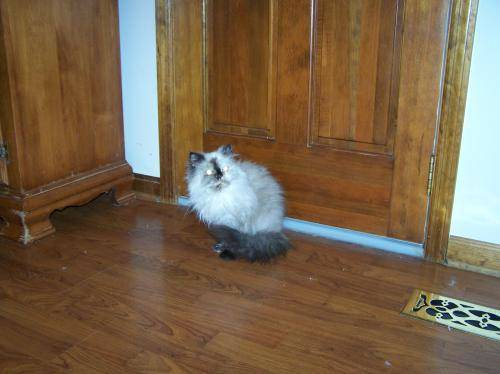

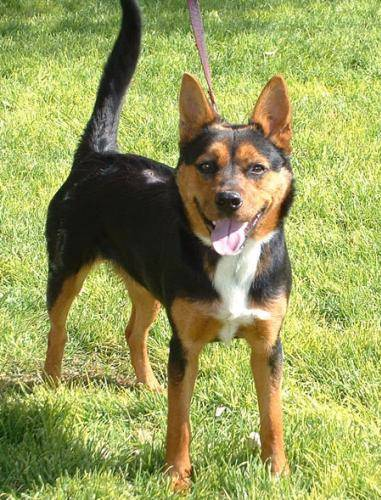

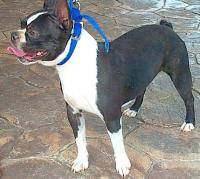

In [49]:
import IPython.display as display

for n in range(3):
    image_path = random.choice(df_train['file_name'])
    display.display(display.Image(DATA_DIR + '/train/' + image_path))
    print()

## Mini Batch Processing

In [20]:
# Slicing the array of strings, results in a dataset of strings:
# path_ds = tf.data.Dataset.from_tensor_slices(train_image_paths)

In [21]:
# ds = tf.data.Dataset.from_tensor_slices((train_image_paths, train_image_labels))

# # The tuples are unpacked into the positional arguments of the mapped function
# def load_and_preprocess_from_path_label(path, label):
#   return load_and_preprocess_image(path), label

# image_label_ds = ds.map(load_and_preprocess_from_path_label)
# image_label_ds

In [22]:
# BATCH_SIZE = 32
# AUTOTUNE = tf.data.experimental.AUTOTUNE


# # Setting a shuffle buffer size as large as the dataset ensures that the data is
# # completely shuffled.
# ds = image_label_ds.shuffle(buffer_size=image_count)
# ds = ds.repeat()
# ds = ds.batch(BATCH_SIZE)
# # `prefetch` lets the dataset fetch batches in the background while the model is training.
# ds = ds.prefetch(buffer_size=AUTOTUNE)
# ds

In [43]:
df_train.shape

(18000, 2)

### Image Preprocessing

In [143]:
# Preprocess Train dataset
train_datagen = ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1)

train_generator = train_datagen.flow_from_dataframe(
        df_train,
        directory=DATA_DIR + '/train/',
        x_col='file_name',
        y_col='category',
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

# Preprocess Validation dataset
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
        df_validation,
        directory=DATA_DIR + '/train/',
        x_col='file_name',
        y_col='category',
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [146]:
IMAGE_SIZE

(120, 120)

In [147]:
df_sample = df_train.sample(1).reset_index(drop=True)
sample_generator = train_datagen.flow_from_dataframe(
    df_sample,
    directory=DATA_DIR + '/train/',
    x_col='file_name',
    y_col='category',
    target_size=IMAGE_SIZE,
    seed=42,
    shuffle=True,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


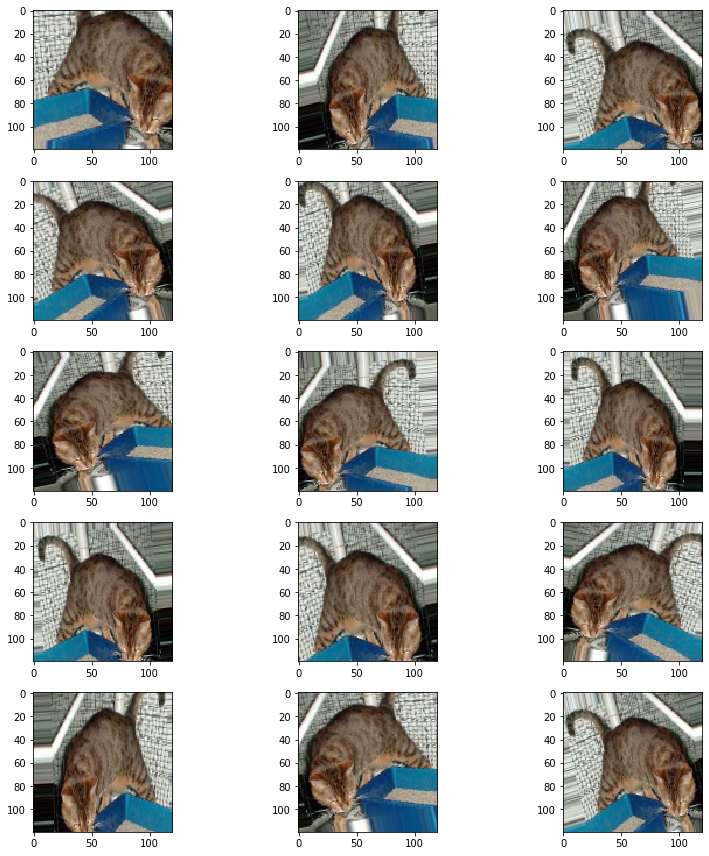

In [148]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in sample_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Create Model

In [149]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

def create_model():
  model = tf.keras.Sequential()
  
#   model.add(tf.keras.layers.Flatten(input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
#   model.add(tf.keras.layers.Dense(128, activation='relu'))
#   model.add(tf.keras.layers.Dropout(0.2))
#   model.add(tf.keras.layers.Dense(2, activation='softmax'))
  
#   model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
#   model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#   model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
#   model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#   model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

#   model.add(tf.keras.layers.Flatten())
#   model.add(tf.keras.layers.Dense(64, activation='relu'))
#   model.add(tf.keras.layers.Dense(10, activation='softmax'))
  
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes
  
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  return model

In [150]:
model = create_model()

In [151]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 118, 118, 32)      896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 118, 118, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 59, 59, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 111392)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               57033216  
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)             

### Create Checkpoint

In [152]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# checkpoint_path = "static/models/checkpoints/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# # by default it saves the weights every epoch
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

callbacks = [
#     EarlyStopping(patience=10, verbose=1),
#     ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('checkpoints/model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

### Train model

In [89]:
# steps_per_epoch=tf.math.ceil(len(train_image_paths)/BATCH_SIZE).numpy()
# model.fit(ds, epochs=1, steps_per_epoch=steps_per_epoch, callback=cp_callback)
validation_generator


In [153]:
total_train = df_train.shape[0]
total_validation = df_validation.shape[0]

print(total_train, total_validation)

STEP_SIZE_TRAIN=total_train//train_generator.batch_size
STEP_SIZE_VALID=total_validation//validation_generator.batch_size

print(STEP_SIZE_TRAIN, STEP_SIZE_VALID)

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks=callbacks,
                    epochs=5)

20000 5000
625 156
Epoch 1/5


InvalidArgumentError:  Incompatible shapes: [32,2] vs. [32]
	 [[node metrics_22/accuracy/Equal (defined at <ipython-input-153-1adc4dc09986>:16) ]] [Op:__inference_keras_scratch_graph_16520]

Function call stack:
keras_scratch_graph
